In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [15]:
# Define the system of differential equations
def car_system(t, state_vector, n, alpha, beta, v0, epsilon):
    """
    Parameters:
    - t: time
    - state_vector: state vector [d1, v1, ..., dn, vn]
    - n: number of cars
    - b, c: parameters of the system
    - T: desired time gap
    - v0: velocity of the front car (constant)
    """
    
    update_statevector = np.zeros([2*n])
    # Extract state variables
    for i in range(n):
        update_statevector[2*i] = state_vector[i]  # Index is 0 or divisible by 2
        update_statevector[2*i+1] = state_vector[i+n]
    # Define A matrix
    A = np.array([
    [0, -1],
    [ alpha, -(1+beta)]
    ])

    B= np.array([[0, 1], [0, 1]])

    system_matrix = np.zeros([2*n, 2*n])

    input_vector = np.zeros([2*n])
    input_vector[0] = 1*v0
    input_vector[1] = 1*v0

    for i in range(n-1):    
        system_matrix[2*i+2:2*i+4, 2*i:2*i+2] = B

    for i in range(n):
        system_matrix[2*i:2*i+2, 2*i:2*i+2] = A

    nonlinear_vector = np.zeros([2*n])
    for i in range(n-1):
        if np.abs(update_statevector[i*2]) > 1e-8:
            nonlinear_vector[2*i+1] = epsilon / update_statevector[i*2]
        else:
            nonlinear_vector[2*i+1] = 0
    
    derivatives = system_matrix.dot(update_statevector) + input_vector - nonlinear_vector
    
    return np.array(derivatives)

(6, 500)


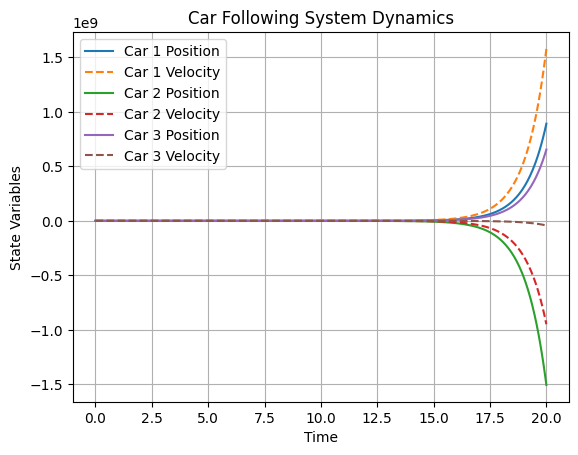

In [16]:
# Parameters
n = 3  # Number of cars
alpha = 0.5
beta = 0.3
v0 = 10.0  # Constant velocity of the front car
epsilon = 0.1

# Initial conditions: [d1, v1, ..., dn, vn]
initial_state = np.array([5.0, 0.0, 4.0, 0.0, 3.0, 0.0])  # Example initial state

t_span = (0, 20)  # From t=0 to t=20
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the system
solution = solve_ivp(
    car_system,
    t_span,
    initial_state,
    t_eval=t_eval,
    args=(n, alpha, beta, v0, epsilon),
    method='RK45'
)

# Extract solution
t = solution.t
y = solution.y
print(solution.y.shape)  # Output: (n, m)

# Plot the results
for i in range(n):
    plt.plot(t, y[2 * i], label=f"Car {i + 1} Position")
    plt.plot(t, y[2 * i + 1], '--', label=f"Car {i + 1} Velocity")

plt.xlabel("Time")
plt.ylabel("State Variables")
plt.legend()
plt.title("Car Following System Dynamics")
plt.grid()
plt.show()